In [0]:
!pip install -q kaggle

import os
os.environ['KAGGLE_USERNAME'] = "katetuzina" # username from the json file
os.environ['KAGGLE_KEY'] = "7578fa8dde4c34ef17a35fab34c9b088" # key from the json file
#!kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle
!kaggle datasets download -d robervalt/sunspots

sunspots.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip sunspots.zip

Archive:  sunspots.zip
replace Sunspots.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sunspots.csv            


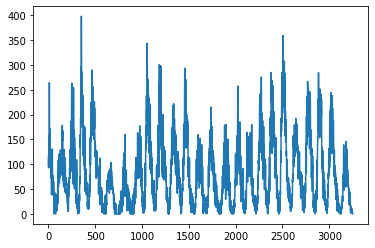

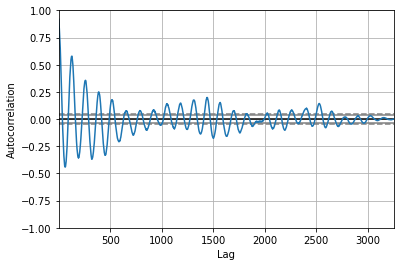

In [0]:
import pandas
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


dataframe = pandas.read_csv('Sunspots.csv', usecols=[2], engine='python')
plt.plot(dataframe)
plt.show()

autocorrelation_plot(dataframe)

In [0]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2276 976


[0.3063787  0.2044199  0.32094425 0.2571572  0.2370668  0.19789052
 0.17478654 0.20190859 0.1569563  0.07835259]


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
 # reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(testY[:10])

[0.41511804 0.51130086 0.38849825 0.33626318 0.3239578  0.27071825
 0.45680562 0.49547967 0.42265195 0.40833753]


predicted=105.534552, expected=112.100000
predicted=107.246697, expected=75.300000
predicted=88.500018, expected=139.200000
predicted=119.917690, expected=122.400000
predicted=118.089734, expected=142.400000
predicted=128.630236, expected=134.300000
predicted=130.644754, expected=128.300000
predicted=125.985576, expected=152.400000
predicted=144.315743, expected=163.400000
predicted=151.895354, expected=139.600000
predicted=142.860535, expected=149.600000
predicted=147.696833, expected=102.300000
predicted=122.111836, expected=83.900000
predicted=106.352766, expected=98.300000
predicted=108.618970, expected=114.800000
predicted=112.110896, expected=104.700000
predicted=106.974992, expected=83.800000
predicted=92.200249, expected=87.900000
predicted=91.557245, expected=97.000000
predicted=96.210522, expected=119.900000
predicted=109.465673, expected=117.100000
predicted=110.480770, expected=109.600000
predicted=107.318670, expected=57.300000
predicted=79.693507, expected=90.100000
predi

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8.031503, expected=27.900000
predicted=21.055181, expected=13.800000
predicted=15.214242, expected=22.400000
predicted=19.440413, expected=16.100000
predicted=17.091360, expected=0.600000
predicted=6.968211, expected=18.100000
predicted=16.640897, expected=9.900000
predicted=11.265243, expected=5.100000
predicted=7.976296, expected=40.100000
predicted=27.775757, expected=15.400000
predicted=15.900535, expected=5.800000
predicted=11.045989, expected=9.800000
predicted=12.453516, expected=3.400000
predicted=7.110084, expected=17.400000
predicted=15.233755, expected=46.000000
predicted=31.450598, expected=39.100000
predicted=31.049565, expected=18.800000
predicted=22.356769, expected=38.200000
predicted=33.588651, expected=47.900000
predicted=41.065311, expected=42.200000
predicted=40.350034, expected=63.400000
predicted=53.588196, expected=48.800000
predicted=47.373611, expected=29.100000
predicted=37.266164, expected=70.500000
predicted=60.218910, expected=45.400000
predicted=

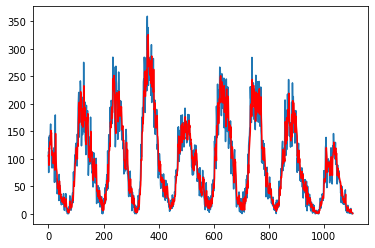

In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = dataframe.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 26s - loss: 0.0146
Epoch 2/5
 - 24s - loss: 0.0048
Epoch 3/5
 - 24s - loss: 0.0048
Epoch 4/5
 - 24s - loss: 0.0048
Epoch 5/5
 - 24s - loss: 0.0048


In [0]:
# make predictions
trainPredict = model.predict(trainX)
print(trainPredict.shape)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict.shape)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

(2274, 1)
(2274, 1)
Train Score: 27.12 RMSE
Test Score: 26.66 RMSE


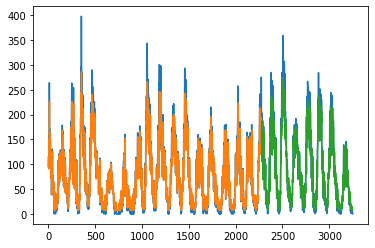

In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()